# Electricity Consumption Forecasting Using ARIMA

This example uses the ARIMA model to forecast electricity consumption using data from [data.gov.ie](https://data.gov.ie/dataset/energy-consumption-gas-and-electricity-civic-offices-2009-2012/resource/6091c604-8c94-4b44-ac52-c1694e83d746). The time series ranges from 29th March 2011 to 17th February 2013.

#### Attributions

The below code uses the [statsmodels](https://github.com/statsmodels/statsmodels/blob/main/LICENSE.txt) library (2009-2018 statsmodels Developers) in executing the below examples, as provided under the BSD 3-Clause License.

Modifications have been made where appropriate for conducting analysis on the data specific to this example.

The copyright and permission notices are made available below:

Copyright (C) 2006, Jonathan E. Taylor
All rights reserved.

Copyright (c) 2006-2008 Scipy Developers.
All rights reserved.

Copyright (c) 2009-2018 statsmodels Developers.
All rights reserved.


Redistribution and use in source and binary forms, with or without
modification, are permitted provided that the following conditions are met:

  a. Redistributions of source code must retain the above copyright notice,
     this list of conditions and the following disclaimer.
  b. Redistributions in binary form must reproduce the above copyright
     notice, this list of conditions and the following disclaimer in the
     documentation and/or other materials provided with the distribution.
  c. Neither the name of statsmodels nor the names of its contributors
     may be used to endorse or promote products derived from this software
     without specific prior written permission.


THIS SOFTWARE IS PROVIDED BY THE COPYRIGHT HOLDERS AND CONTRIBUTORS "AS IS"
AND ANY EXPRESS OR IMPLIED WARRANTIES, INCLUDING, BUT NOT LIMITED TO, THE
IMPLIED WARRANTIES OF MERCHANTABILITY AND FITNESS FOR A PARTICULAR PURPOSE
ARE DISCLAIMED. IN NO EVENT SHALL STATSMODELS OR CONTRIBUTORS BE LIABLE FOR
ANY DIRECT, INDIRECT, INCIDENTAL, SPECIAL, EXEMPLARY, OR CONSEQUENTIAL
DAMAGES (INCLUDING, BUT NOT LIMITED TO, PROCUREMENT OF SUBSTITUTE GOODS OR
SERVICES; LOSS OF USE, DATA, OR PROFITS; OR BUSINESS INTERRUPTION) HOWEVER
CAUSED AND ON ANY THEORY OF LIABILITY, WHETHER IN CONTRACT, STRICT
LIABILITY, OR TORT (INCLUDING NEGLIGENCE OR OTHERWISE) ARISING IN ANY WAY
OUT OF THE USE OF THIS SOFTWARE, EVEN IF ADVISED OF THE POSSIBILITY OF SUCH
DAMAGE.

The dataset used in this example is sourced from [data.gov.ie](https://data.gov.ie/dataset/energy-consumption-gas-and-electricity-civic-offices-2009-2012/resource/6091c604-8c94-4b44-ac52-c1694e83d746).

The below work and findings are not endorsed by the original authors in any way.

In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pmdarima as pm
from sklearn.metrics import mean_squared_error
import statsmodels as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.tsa.stattools as ts
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose

# fix random seed for reproducibility
np.random.seed(7)

# load dataset
d1 = pd.read_csv('dccelectricitycivicsblocks34p20130221-1840.csv', engine='python', skipfooter=3)
d1

,Civic Offices Blocks 3 and 4 KWh,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 88,Unnamed: 89,Unnamed: 90,Unnamed: 91,Unnamed: 92,Unnamed: 93,Unnamed: 94,Unnamed: 95,Unnamed: 96,Unnamed: 97
0,Date,Values,00:00,00:15,00:30,00:45,01:00,01:15,01:30,01:45,...,21:30,21:45,22:00,22:15,22:30,22:45,23:00,23:15,23:30,23:45
1,29/03/2011,96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,31.80000305,31.20000076,31.65000153,30.60000038,32.85000229,31.05000305,32.10000229,31.35000229,31.65000153,30.15000153
2,30/03/2011,96,32.10000229,32.40000153,33.60000229,33,29.70000076,30.90000153,31.50000191,33,...,35.70000076,33.60000229,34.20000076,34.80000305,34.65000153,33.75,33.15000153,32.70000076,31.50000191,33.60000229
3,31/03/2011,96,32.10000229,33.60000229,35.10000229,33.45000076,31.20000076,31.35000038,34.20000076,33.75,...,33,33,35.25,34.35000229,32.40000153,31.20000076,32.84999847,33.45000076,32.10000229,32.10000229
4,01/04/2011,96,32.70000076,34.5,30.30000305,33,33,31.5,30.30000305,32.84999847,...,32.25,33.45000076,33,30.45000076,33.15000153,30.60000229,30.15000153,32.55000305,33,30.15000153
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
688,13/02/2013,96,25,25,25.5,24.5,25,26,25.5,25.5,...,33,32.5,30.5,27.5,26,26,26,26,25.5,26.5
689,14/02/2013,96,26,25.5,26,25.5,25,27,25.5,26.5,...,31,30,30.5,29,28,26.5,25.5,25,25.5,25
690,15/02/2013,96,25.5,24.5,25.5,24.5,25,26.5,25,25.5,...,29,27,28,28,25.5,26,25.5,25.5,24.5,25
691,16/02/2013,96,25,25,24.5,24.5,24.5,26.5,25,25.5,...,24.5,24,24.5,26,24.5,24,25,24.5,25,24


In [2]:
d2=d1.rename(columns=d1.iloc[0])
d3=d2.drop(d1.index[0])
d3
d3.drop(d3.index[0])
d4=d3.drop('Date', axis=1)
d5=d4.drop('Values', axis=1)
d5
d6=d5.dropna()
d7=d6.values
d7
df=np.sum(d7, axis=1, dtype=float)
df

array([4981.5001927 , 5166.60016445, 3046.35014537, 3101.10013769,
       4908.60016439, 4858.50017742, 4905.00019836, 4999.95019526,
       3075.90013122, 3023.5501442 , 5004.6001587 , 5199.30019957,
       5226.75017163, 5162.55022428, 4991.55017468, 2950.20010378,
       4883.85017776, 5055.15017129, 5084.10021592, 4914.00019451,
       3581.55014991, 2981.55008892, 2967.00011064, 3515.70014566,
       4721.10016438, 4931.85019494, 5020.05018234, 4799.40017322,
       3043.20012856, 2929.05012318, 3423.45014192, 4949.55017475,
       5155.05015188, 5238.75021174, 5129.10016059, 3088.95013995,
       3017.40010454, 5041.95018196, 5170.80017096, 5250.90023994,
       5239.35021975, 5163.60019308, 3169.65013694, 3034.65012932,
       5056.05021094, 5052.6001988 , 5048.2501869 , 4971.75019264,
       3013.20013239, 2919.45011703, 4830.0002022 , 5007.90018087,
       5028.00018885, 5088.60017207, 5092.35015869, 3069.90011787,
       2909.85011099, 4923.60022544, 5136.75021744, 5233.65021

In [3]:
len(df)

680

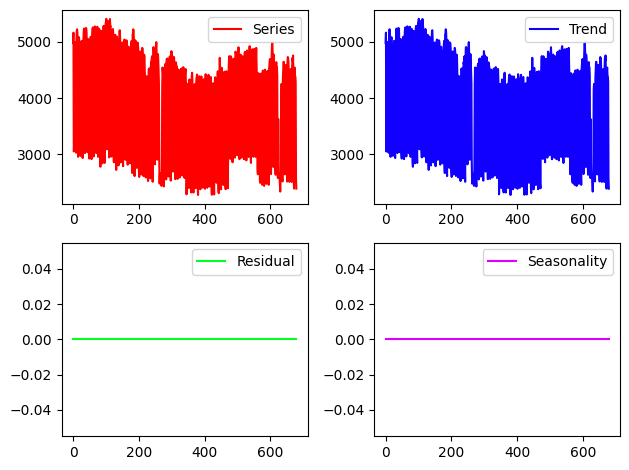

In [4]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition=seasonal_decompose(df, model='additive', period=1)
trend=decomposition.trend
seasonal=decomposition.seasonal
residual=decomposition.resid
plt.subplot(221)
plt.plot(df,color='#ff0000', label='Series')
plt.legend(loc='best')
plt.subplot(222)
plt.plot(trend,color='#1100ff', label='Trend')
plt.legend(loc='best')
plt.tight_layout()
plt.subplot(223)
plt.plot(residual,color='#00ff1a', label='Residual')
plt.legend(loc='best')
plt.tight_layout()
plt.subplot(224)
plt.plot(seasonal,color='#de00ff', label='Seasonality')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

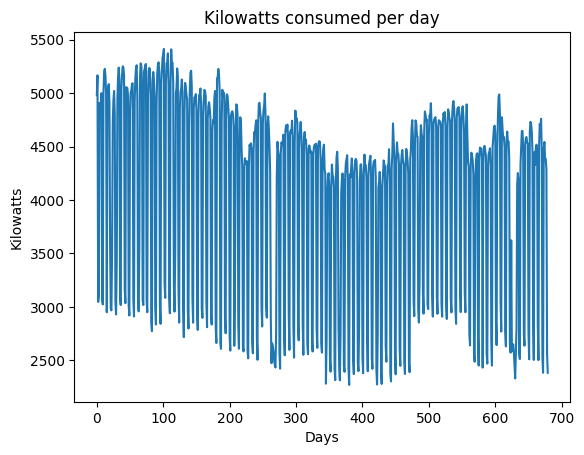

In [5]:
plt.plot(df)
plt.xlabel('Days')
plt.ylabel('Kilowatts')
plt.title("Kilowatts consumed per day")
plt.show()

In [7]:
train_size = int(len(df) * 0.8)
test_size = len(df) - train_size
train, test = df[0:train_size], df[train_size:len(df)]

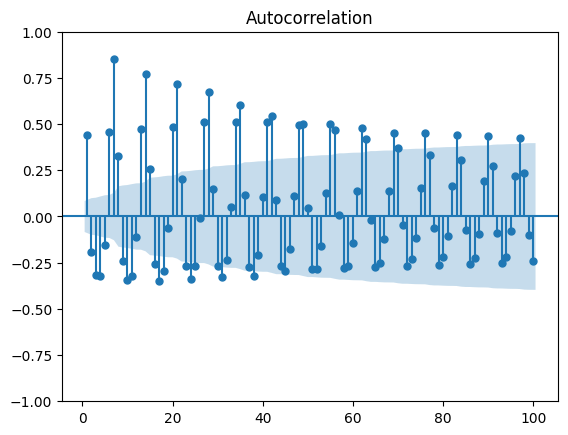

In [10]:
plot_acf(train, lags=100, zero=False);

/home/michael/.local/lib/python3.8/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


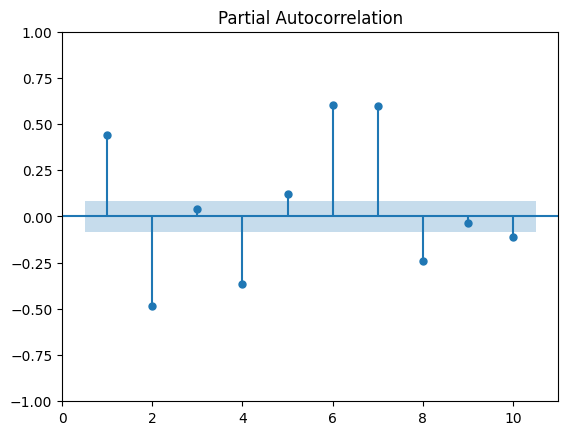

In [11]:
plot_pacf(train, lags=10, zero=False);

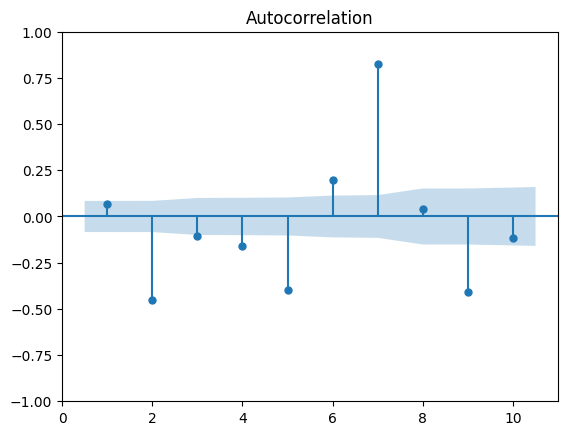

In [12]:
plot_acf(np.diff(train, 1), lags=10, zero=False);

In [13]:
window_size = 7

numbers_series = pd.Series(train)
windows = numbers_series.rolling(window_size)
moving_averages = windows.mean()

moving_averages_list = moving_averages.tolist()
ts7 = moving_averages_list[window_size - 1:]
ts7=np.array(ts7)
print(ts7)

[4423.95016863 4426.58588328 4127.91444996 4124.65730693 4396.58588136
 4438.11445782 4490.72159985 4527.51446069 4526.31445775 4508.35731098
 4774.11445863 4781.335889   4764.87874848 4720.20018032 4494.34302684
 4207.20015744 4209.60015842 4014.15015384 3966.42872428 3944.67872128
 3959.82871954 4133.8072943  4142.61444282 4137.19301604 4124.01444408
 4156.65015984 4188.53586798 4219.77872932 4266.87872752 4273.41444343
 4286.03586934 4517.25016077 4548.85730309 4562.55017281 4562.63588824
 4567.56446431 4579.09303531 4581.55732456 4583.57161442 4566.68590411
 4537.73589653 4499.50732123 4192.30731256 4156.56445257 4413.04303441
 4406.16445869 4402.65017155 4408.41445515 4425.64302173 4433.74301965
 4432.37159022 4445.74302211 4464.15017019 4493.52874484 4518.06446212
 4497.96446582 4499.01446778 4505.91446904 4307.50731386 4309.05016518
 4315.50016376 4315.28587505 4332.77158957 4330.62873243 4339.17873411
 4576.86445837 4588.15731976 4586.2287516  4588.20018196 4300.00731877
 4284.

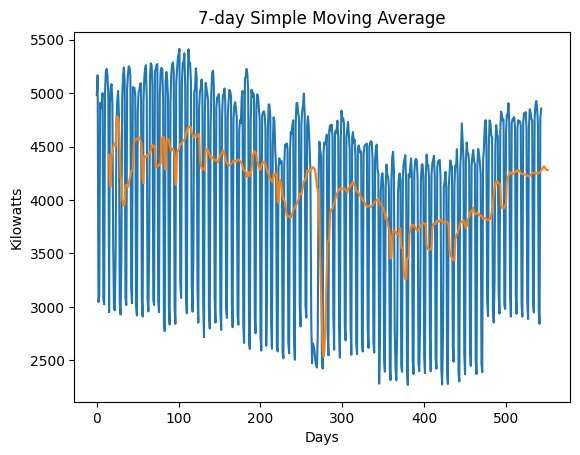

In [15]:
n1=math.nan
n7=np.array([n1,n1,n1,n1,n1,n1,n1])
ts7=np.concatenate([n7,ts7])
plt.plot(train)
plt.plot(ts7)
plt.xlabel('Days')
plt.ylabel('Kilowatts')
plt.title("7-day Simple Moving Average")
plt.show()

In [16]:
#Dickey-Fuller Test
result = ts.adfuller(train, 1)
result

(-20.795926045244208,
 0.0,
 1,
 542,
 {'1%': -3.442472769145813,
  '5%': -2.8668873212324817,
  '10%': -2.5696179384812297},
 8717.49142974098)

In [17]:
model=sm.tsa.statespace.sarimax.SARIMAX(endog=train,order=(2,1,0),seasonal_order=(2,1,0,7),trend='c',enforce_invertibility=False)
results=model.fit()
print(results.summary())

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.49953D+00    |proj g|=  6.93712D-02


 This problem is unconstrained.



At iterate    5    f=  7.49699D+00    |proj g|=  1.25593D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      6      8      1     0     0   8.042D-05   7.497D+00
  F =   7.4969857004820684     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                  544
Model:             SARIMAX(2, 1, 0)x(2, 1, 0, 7)   Log Likelihood               -4078.360
Date:                           Mon, 26 Jun 2023   AIC                           8168.720
T

In [18]:
predictions=results.predict(545, 680, typ='levels')

In [19]:
len(predictions)

136

In [20]:
predictions=predictions.reshape(136,-1)
predictions

array([[4825.34738255],
       [4703.82582165],
       [2976.59488886],
       [2839.62390079],
       [4736.3410766 ],
       [4840.19261669],
       [4829.96635958],
       [4802.60697149],
       [4696.67407699],
       [2977.32281229],
       [2843.41007538],
       [4731.68452703],
       [4837.00270583],
       [4835.24910218],
       [4804.12682803],
       [4690.92583673],
       [2968.18365638],
       [2833.98245697],
       [4730.71360184],
       [4833.5592792 ],
       [4829.59191124],
       [4802.03716012],
       [4689.14589213],
       [2966.88263217],
       [2833.07438162],
       [4729.60559894],
       [4833.72621405],
       [4829.80609443],
       [4802.67086141],
       [4691.70317025],
       [2970.6764534 ],
       [2837.61791212],
       [4733.62602982],
       [4838.60540416],
       [4835.8506017 ],
       [4808.82193375],
       [4698.06996729],
       [2977.42649877],
       [2844.90383921],
       [4741.90755796],
       [4847.24642803],
       [4844.966

In [21]:
len(predictions)

136

In [23]:
len(test)

136

In [24]:
mse = mean_squared_error(test, predictions)
rmse = math.sqrt(mse)
print('RMSE: %f' % rmse)

RMSE: 1120.015438


In [25]:
np.mean(test)

3905.8786764705883

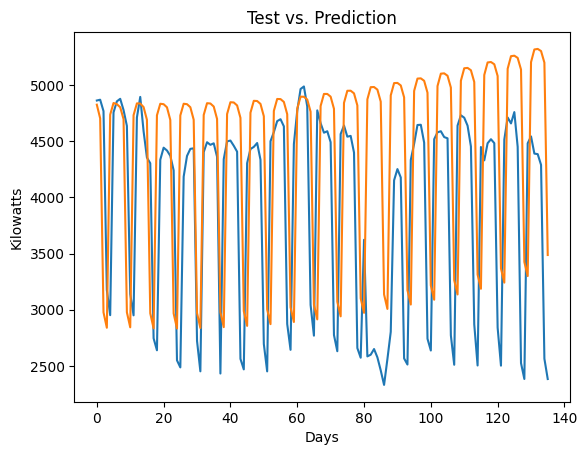

In [26]:
plt.plot(test)
plt.plot(predictions)
plt.xlabel('Days')
plt.ylabel('Kilowatts')
plt.title("Test vs. Prediction")
plt.show()